#### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# set folder path

path = r'C:\Users\shyro\OneDrive\Documents\Instacart Basket Analysis'

In [4]:
# Import ords_prods_merged_grouped_aggregated.pkl

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merged_grouped_aggregated.pkl'))

#### 2. Creating bar charts

<Axes: >

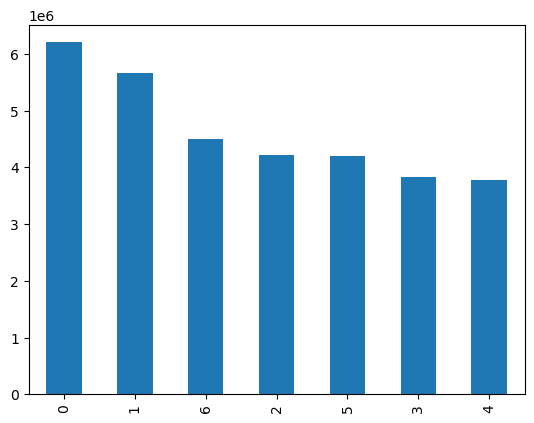

In [5]:
# Create a bar chart

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

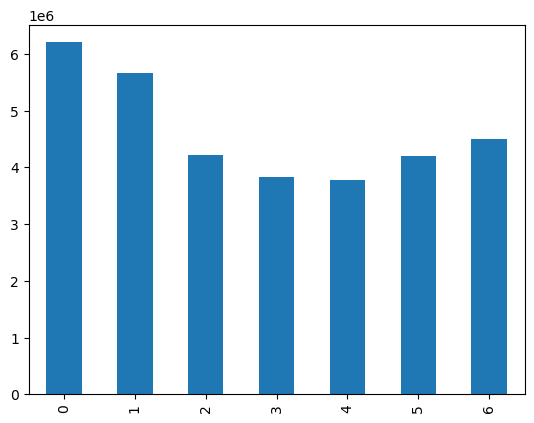

In [7]:
# re-sort bar chart based on index number 

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

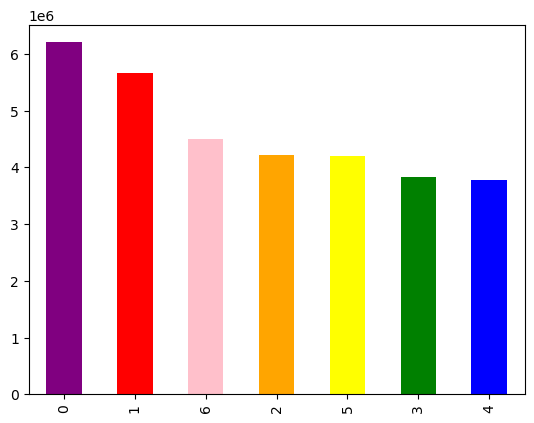

In [11]:
# to add colors in the bar chart 

bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink','orange', 'yellow', 'green', 'blue'])

In [12]:
# export bar chart 

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

#### 3. Histograms

<Axes: ylabel='Frequency'>

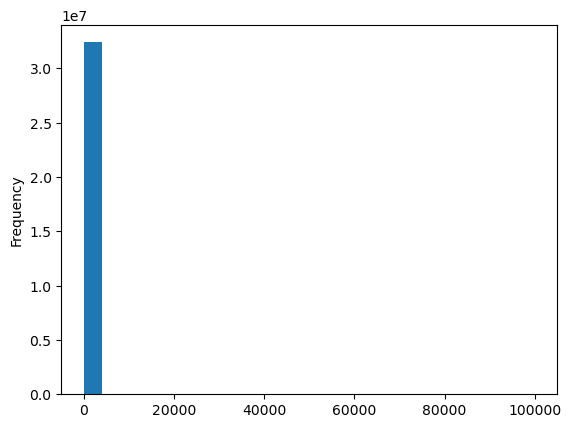

In [13]:
# creating a histogram of the “prices” column

ords_prods_merge['prices'].plot.hist(bins = 25)

In [14]:
# data integrity check

ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [15]:
ords_prods_merge['prices'].mean()

11.980225638383454

In [16]:
ords_prods_merge['prices'].median()

7.4

In [17]:
ords_prods_merge['prices'].max()

99999.0

#### Observation: having most values between 7 and 12 (see the median and mean again) but an extreme value of 99,999 is forcing your histogram to shove all the small values into one bar and the extreme value in another one. And this second bar is so tiny that you can’t even see it on the chart. Hence, the one-column histogram you saw above.

<Axes: xlabel='prices', ylabel='prices'>

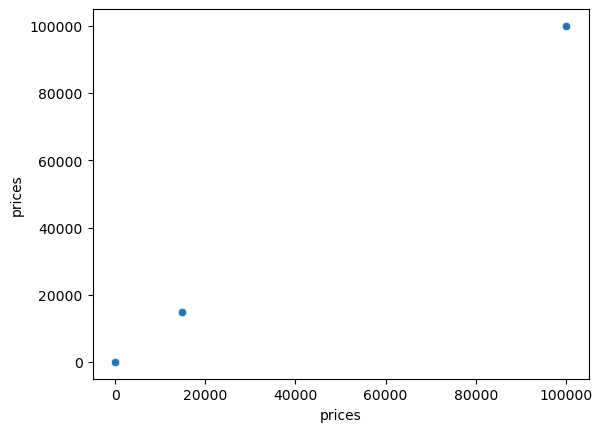

In [18]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [19]:
# run data integrity on price exceeding $100

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_hours_of_day,max_order,loyalty_flag,avg_prices,spending_flag,median_freq,frequency_flag
10030345,912404,17,prior,12,2,14,5.0,21553,5,0,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,14900.0,High spender,30.0,Non-frequent customer
10030346,603376,17,prior,22,6,16,4.0,21553,3,1,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,14900.0,High spender,30.0,Non-frequent customer
10030347,3264360,135,prior,2,2,21,13.0,21553,6,0,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,14900.0,High spender,13.0,Regular customer
10030348,892534,135,prior,3,0,8,12.0,21553,3,1,...,High-range product,Busiest day,Busiest day,Average orders,4,New customer,14900.0,High spender,13.0,Regular customer
10030349,229704,342,prior,8,1,19,30.0,21553,9,0,...,High-range product,Regularly busy,Busiest day,Average orders,16,Regular customer,14900.0,High spender,30.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,prior,29,0,8,4.0,33664,1,0,...,High-range product,Busiest day,Busiest day,Average orders,39,Regular customer,99999.0,High spender,30.0,Non-frequent customer
29166210,2363282,204099,prior,31,0,9,2.0,33664,1,1,...,High-range product,Busiest day,Busiest day,Most orders,39,Regular customer,99999.0,High spender,30.0,Non-frequent customer
29166211,3181945,204395,prior,13,3,15,8.0,33664,25,0,...,High-range product,Regularly busy,Least busy,Most orders,15,Regular customer,99999.0,High spender,11.0,Regular customer
29166212,2486215,205227,prior,7,3,20,4.0,33664,8,0,...,High-range product,Regularly busy,Least busy,Average orders,12,Regular customer,99999.0,High spender,30.0,Non-frequent customer


In [20]:
# to turn prices over $100 to NaNs

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [22]:
ords_prods_merge['prices'].max()

25.0

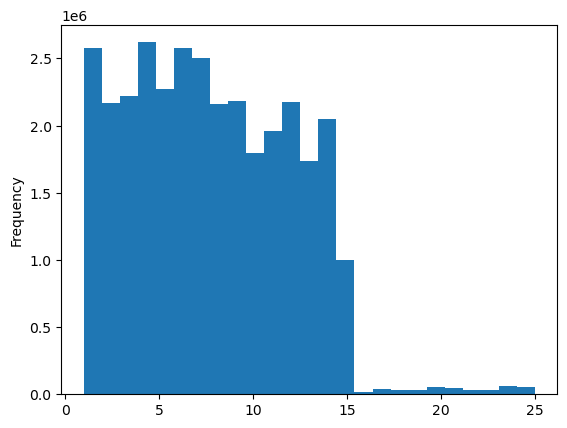

In [24]:
# re-run histogram after excluding prices > $100

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

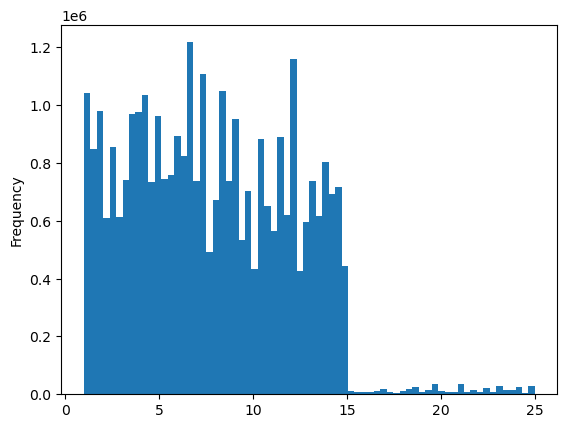

In [25]:
# run histogram with 70 bins

hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [26]:
# export histogram chart 

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

#### 4. Sampling data

In [27]:
# create a 70/30 sample

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [28]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [31]:
# produce 10 random numbers

np.random.rand(10)

array([0.61518855, 0.33319665, 0.04099601, 0.88078504, 0.46206509,
       0.51543275, 0.51724006, 0.90712175, 0.03869044, 0.15665773])

In [37]:
# get the legth of the dataframe ords_prods_merge

len(ords_prods_merge)

32404859

In [38]:
# produce 32404859 random numbers

np.random.rand(32404859)

array([0.07377143, 0.12977092, 0.95135392, ..., 0.43188915, 0.16712924,
       0.35774006])

In [41]:
# Store the results of the test in a new list, dev, in the form of boolean values (True and False).

dev

array([False,  True, False, ...,  True,  True,  True])

In [43]:
# create a list holding True/False values to the test np.random.rant() <=0.7

dev = np.random.rand(len(ords_prods_merge)) <=0.7

In [44]:
# Store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [45]:
# Store 30% of of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [46]:
# Check len of dataframe

len(ords_prods_merge)

32404859

In [47]:
# check the len of big and small dataframes

len(big) + len(small)

32404859

In [49]:
# reduce your samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.” 

df_2 = small[['orders_day_of_week','prices']]

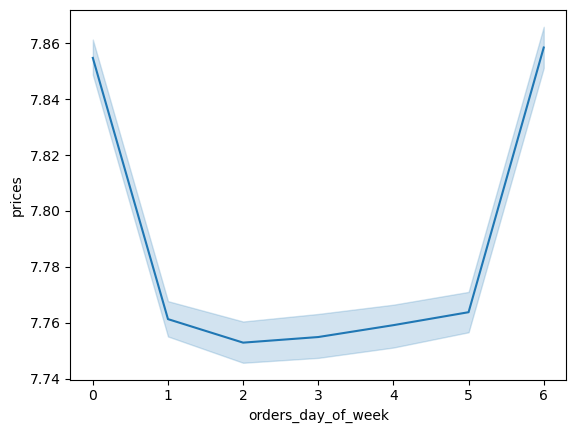

In [50]:
# create a line chart for df_2 dataframe

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')